# Analisis exploratorio de datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# split para modelado
from sklearn.model_selection import train_test_split
from matplotlib.colors import TwoSlopeNorm
# Scaled | Escalado
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Encoding | Codificación
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
# To save models
import json
import pickle
# Feature Selection
from sklearn.feature_selection import f_classif, SelectKBest

## Paso 1: Definición del problema

Queremos entrenar un modelo capaz de darnos el precio mas adecuado para alquilar un inmueble en cierta ubicacion.

## Paso 2: Recopilación de datos

In [2]:
df = pd.read_csv("../data/raw/internal-link.csv")

## Paso 3: Análisis Descriptivo

Empezaremos a visualizar el DataFrame para analizar sus datos

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


### Datos observados

>1. Ahora sabemos que el DataFrame tiene 48895 filas, 16 columnas y notamos que `name, host_name, last_review, reviews_per_mount`, tienen algunos valores nulos
>2. Sobre `name` no indagaremos ahora, dejaremos la idea de revisar si con el `host_id` podemos completar las variables de `host_name` mas adelante.
>3. Tambien sabemos que algunas viviendas no tienen review, mas adelante podriamos revisar si esto nos dice algo, pero de momento asumiremos que quizas algo no atrajo posibles inquilinos por alguna razon. Precio alto, tiempos minimos altos, o mala ubicacion.
>4. Tenemos 7 variables numericas y 9 categoricas.
>5. En `price` hay algun valor que tiene minimo 0, ya descubriremos si según los datos eso influye en algo, pero claramente nos afecta la media.
>6. En `minimum_nights` algun valor es equivalente a 1250 dias, luego veremos si esto tiene sentido, pero de entrada 1250 dias podria no ser atractivo para alquilar un inmueble.
>7. Con `calculated_host_listings_count` podemos entender que hay personas que solo tienen un inmueble, pero otras que tienen muchos. La media de inmuebles por persona es de 7.
>8. `availability_365` al tener un minimo de 0 podemos entender que hubo inmueble que no estuvieron disponibles ningún dia del año por alguna razon.

## Paso 4: Limpieza de Datos

### Limpieza de datos: Eliminar duplicados

Buscaremos si hay algun duplicado que podamos eliminar de nuestros datos.

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.duplicated('id').sum()

np.int64(0)

In [8]:
doble_mask = df.duplicated(subset=['latitude','longitude'], keep=False)
df_doble = df[doble_mask].sort_values(['latitude','longitude'])
df_doble[['latitude', 'longitude', 'room_type', 'host_id']].head(5)


,latitude,longitude,room_type,host_id
41135,40.67825,-73.92346,Private room,237421509
47284,40.67825,-73.92346,Private room,268358454
9561,40.68398,-73.94101,Private room,38460304
17472,40.68398,-73.94101,Entire home/apt,46644337
31746,40.70125,-73.91051,Private room,38874050


#### Observaciones

>En un principio se sospecho que una latitud y longitud podría coincidir en un edificio, pero no tendria sentido que existiese mas de un tipo de casa en la misma ubicación. Con esta exploracion recien podemos ver que pueden alquilar habitaciones o pisos enteros en la misma ubicacion. Por ende no hay datos que borrar que logremos detectar.

### Limpieza de datos: Eliminar información irrelevante

> Definimos que las variables que el algoritmo no utilizará en el proceso predictivo son:
 >
 > `name,last_review,host_id,host_name,calculated_host_listings_count,neighbourhood_group,neighbourhood`

In [9]:
df.drop(["name", "last_review", "host_id",
          "host_name", "calculated_host_listings_count",
            "neighbourhood_group", "neighbourhood"],
              axis=1, inplace=True)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


En el ultimo describe observamos que hay algunas variables que probablemente no tienen sentido y las descartamos, en `price` hay unas que tienen como valor 0, las que no tuvieron disponibilidad este año `availability_365 = 0` tambien la quitaremos ya que puede que hayan tenido en otro momento, pero para el año 2019 no parece que nos digan datos reales. Tambien quitaremos `number_of_reviews` por que no nos funcionan datos donde nadie haya querido poner alguna reviews, es verdad que se pueden haber alquilado inmuebles y no dejado reseñas, pero como apuntamos como objetivo un precio ideal nos funciona observar las casas donde hubieron reseñas positivas.

In [11]:
(df["price"] == 0).sum(), (df["availability_365"] == 0).sum(), (df["number_of_reviews"] == 0).sum()
df.drop(index=df.index[df["price"].eq(0)], inplace=True)
df.drop(index=df.index[df["availability_365"].eq(0)], inplace=True)
df.drop(index=df.index[df["number_of_reviews"].eq(0)], inplace=True)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,26147.0,1.931989e+07,1.121263e+07,2539.00000,9.453270e+06,2.078804e+07,2.951079e+07,3.645581e+07
latitude,26147.0,4.072749e+01,5.693793e-02,40.50641,4.068704e+01,4.072168e+01,4.076303e+01,4.091306e+01
longitude,26147.0,-7.394773e+01,5.148009e-02,-74.24442,-7.398242e+01,-7.395304e+01,-7.392924e+01,-7.371299e+01
price,26147.0,1.499310e+02,1.988301e+02,10.00000,7.000000e+01,1.090000e+02,1.750000e+02,9.999000e+03
minimum_nights,26147.0,6.584924e+00,1.960390e+01,1.00000,1.000000e+00,2.000000e+00,4.000000e+00,1.250000e+03
number_of_reviews,26147.0,3.819195e+01,5.436304e+01,1.00000,5.000000e+00,1.600000e+01,4.900000e+01,6.290000e+02
reviews_per_month,26147.0,1.810063e+00,1.805657e+00,0.01000,4.500000e-01,1.230000e+00,2.680000e+00,5.850000e+01
availability_365,26147.0,1.706148e+02,1.241619e+02,1.00000,5.300000e+01,1.600000e+02,2.920000e+02,3.650000e+02


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26147 entries, 0 to 48852
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 26147 non-null  int64  
 1   latitude           26147 non-null  float64
 2   longitude          26147 non-null  float64
 3   room_type          26147 non-null  object 
 4   price              26147 non-null  int64  
 5   minimum_nights     26147 non-null  int64  
 6   number_of_reviews  26147 non-null  int64  
 7   reviews_per_month  26147 non-null  float64
 8   availability_365   26147 non-null  int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 2.0+ MB


Con esta limpieza hemos sacado tambien los valores nulos, asi que ya tenemos por completo un DataFrame limpio para analizar.

## Paso 5: Análisis de Variables

### Variables categoricas.

Para variables categoricas a este punto nos queda `room_type`

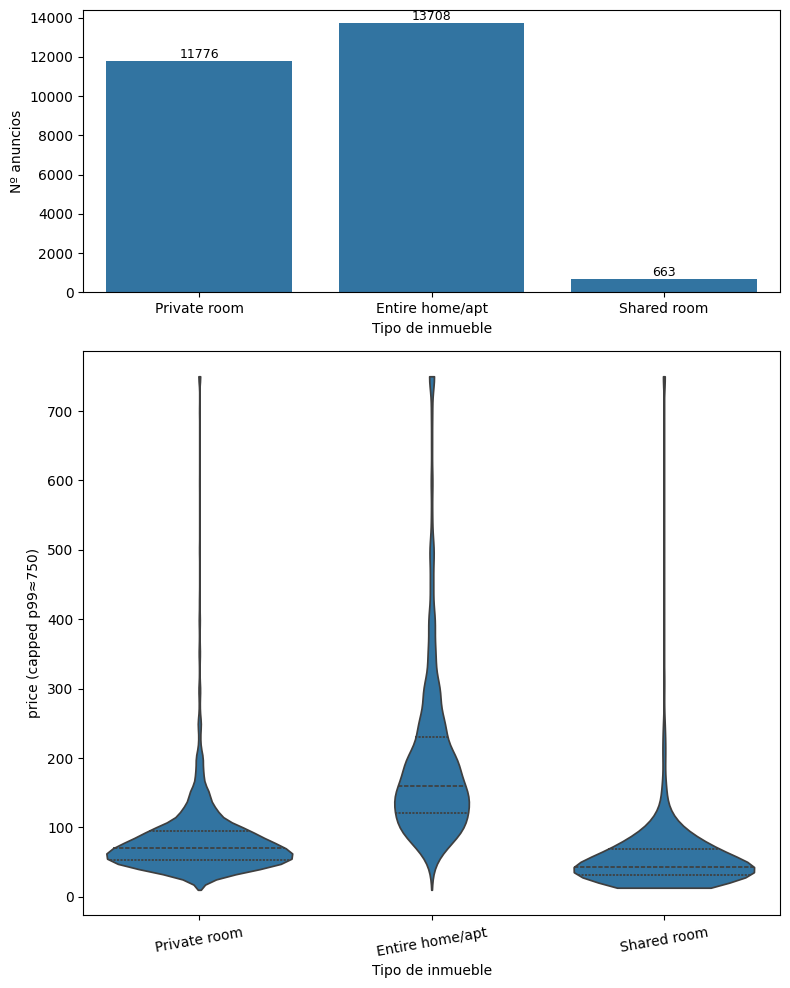

In [14]:
fig, axes = plt.subplots(2, 1, figsize=(8, 10), gridspec_kw={'height_ratios':[1, 2]})
sns.countplot(data=df, x='room_type', ax=axes[0])
axes[0].set_xlabel('Tipo de inmueble')
axes[0].set_ylabel('Nº anuncios')
axes[0].bar_label(axes[0].containers[0], padding=0, fontsize=9)

# cap a p99 para evitar los precios altos aplaste el violín
p99 = df['price'].quantile(0.99)
x = df['room_type']
y = np.minimum(df['price'].to_numpy(), p99)

sns.violinplot(x=x, y=y, inner='quartile', cut=0, ax=axes[1])
axes[1].set_xlabel('Tipo de inmueble')
axes[1].set_ylabel(f'price (capped p99≈{p99:.0f})')
axes[1].tick_params(axis='x', rotation=10)

plt.tight_layout()
plt.show()

#### Observaciones

>Con el grafico anterior podemos ver que según el tipo de inmueble los precios varian. Aplicamos un capped para evitar los outlier que no dejan visualizar bien nuestro violín.

### Variables Univariante Numérica

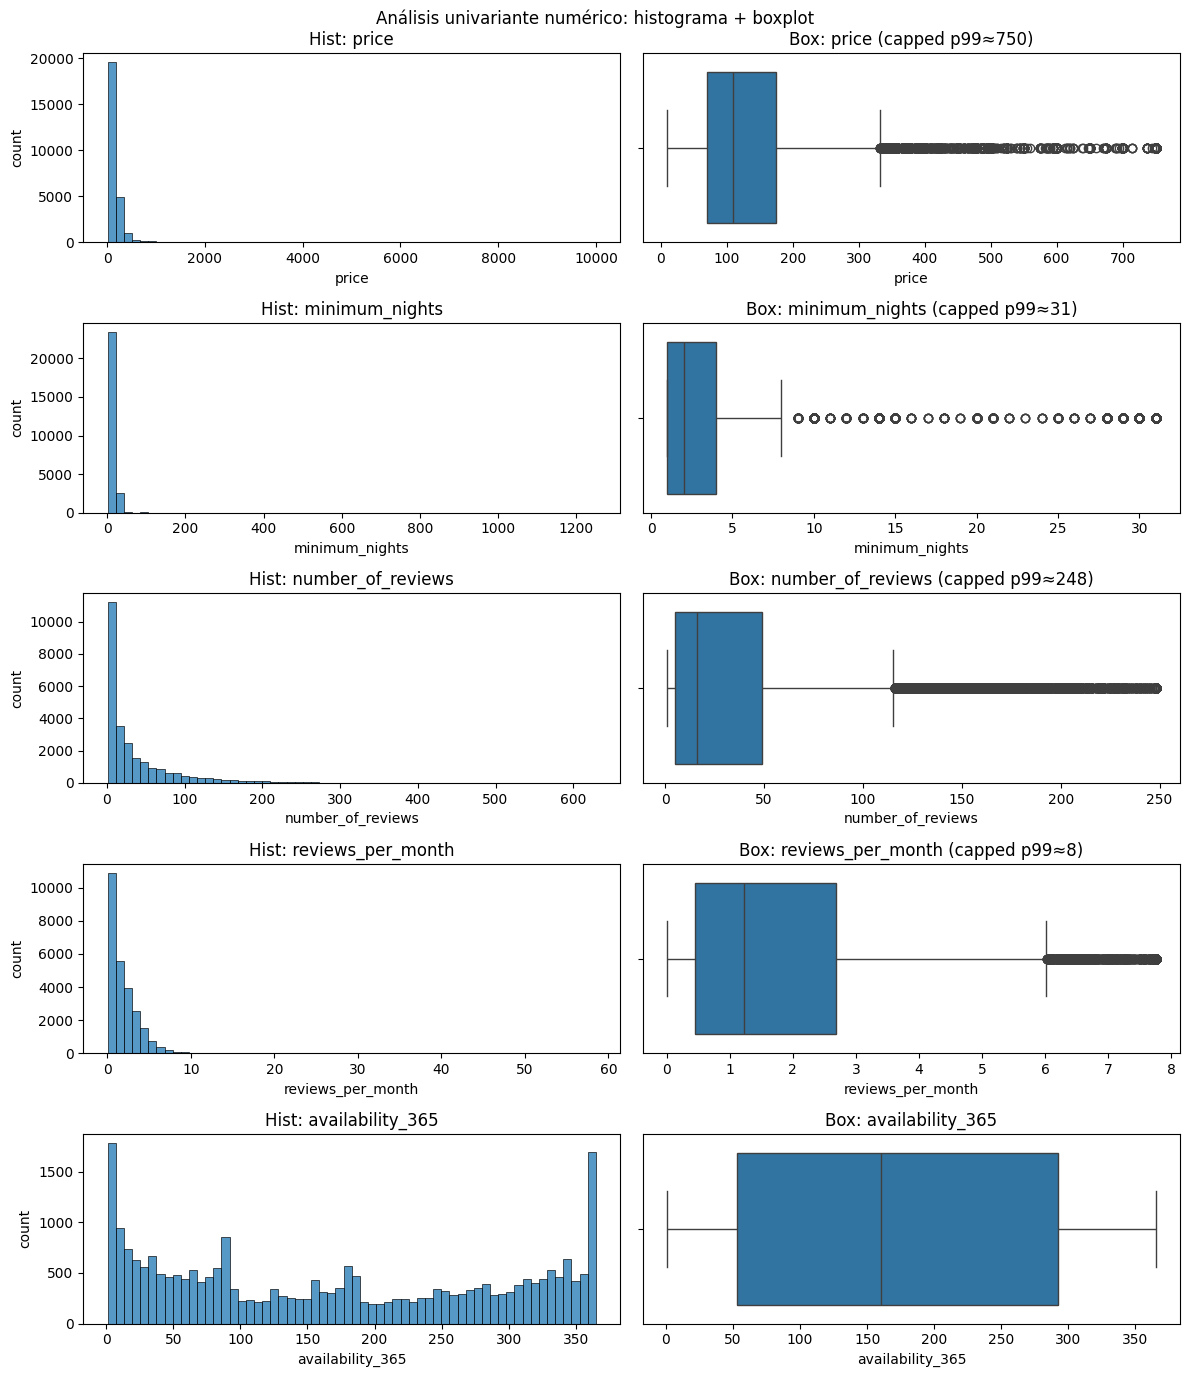

In [15]:
var_univ_num = ['price','minimum_nights','number_of_reviews','reviews_per_month','availability_365']

# cap 99% por variable (sólo a efectos de visualización)
p99_map = {foo: df[foo].quantile(0.99) for foo in var_univ_num}

fig, axes = plt.subplots(len(var_univ_num), 2, figsize=(12, 14))
fig.suptitle('Análisis univariante numérico: histograma + boxplot')

for i, col in enumerate(var_univ_num):
    # Histograma (Dato sin cap)
    if i < 4:
        sns.histplot(df[col], bins=60, ax=axes[i, 0])
        axes[i, 0].set_title(f'Hist: {col}')
        axes[i, 0].set_xlabel(col)
        axes[i, 0].set_ylabel('count')
        # Boxplot (capado p99 para legibilidad)
        y_box = np.minimum(df[col].to_numpy(), p99_map[col])
        sns.boxplot(x=y_box, ax=axes[i, 1])
        axes[i, 1].set_title(f'Box: {col} (capped p99≈{p99_map[col]:.0f})')
        axes[i, 1].set_xlabel(col)
    else:
        sns.histplot(df[col], bins=60, ax=axes[i, 0])
        axes[i, 0].set_title(f'Hist: {col}')
        axes[i, 0].set_xlabel(col)
        axes[i, 0].set_ylabel('count')

        y_box = df[col].to_numpy()
        sns.boxplot(x=y_box, ax=axes[i, 1])
        axes[i, 1].set_title(f'Box: {col}')
        axes[i, 1].set_xlabel(col)

plt.tight_layout()
plt.show()

#### Observaciones

>Podemos ver que nuestras variable en el histograma se tienden a concentar en un solo lugar, para poder visualizar mejor los datos hemos decidido poner un boxplot con un capped al 99%, asi evitamos los outliers momentaneamente para ver donde se agrupan nuestro mayor numero de variables. 
>
>En precios notamos que hay en el histograma outliners que llegan a los 10000, pero gracias al boxplot con capped notamos que la mayor concentracion esta entre los 80 y 180 aproximadamente.
>En cuanto a las noches minimas venos que existen valores de hasta 1200, pero la mayor concentracion esta entre 1 y 4.
>
>En cuanto a numero de reviews aunque hay algunos que abarcan valores sobre los 600 observamos que la mayoria estan entre 1 y 50
>
>En cuanto a reviews por mes tenemos que hay hasta 60, pero la concentracion de variables esta entre 0.5 y 2.8 aproximadamente.
>
>
>Finalmente tenemos la disponibilidad, tenemos desde 1 hasta 365 (los dias del año 2019) en este caso el histograma nos muestra una dispercion de referencia muy buena, no usaremos capped para poder ver este boxplot que nos muestra claramente que hay una acumulacion de datos entre 50 y 290 aproximadamente.

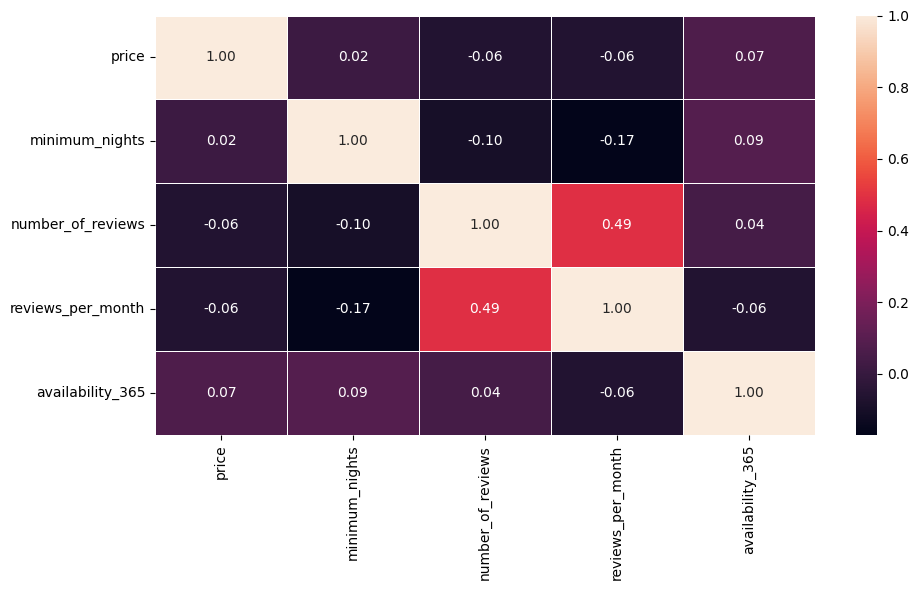

In [16]:
corr = df[["price", "minimum_nights", "number_of_reviews", "reviews_per_month", "availability_365"]].corr()

fig, axis = plt.subplots(figsize=(10, 6))
sns.heatmap(corr, annot=True, linewidths=0.5, fmt=".2f")

plt.tight_layout()
plt.show()

#### Observaciones

>Tenemos una correlacion entre las reviews por mes y el numero de las reviews. Tiene mucho sentido ya que el reviews por mes deberia ser una media que sube cuando suben las reviews generales suben. De resto, nada que este directamente relacionado al precio.


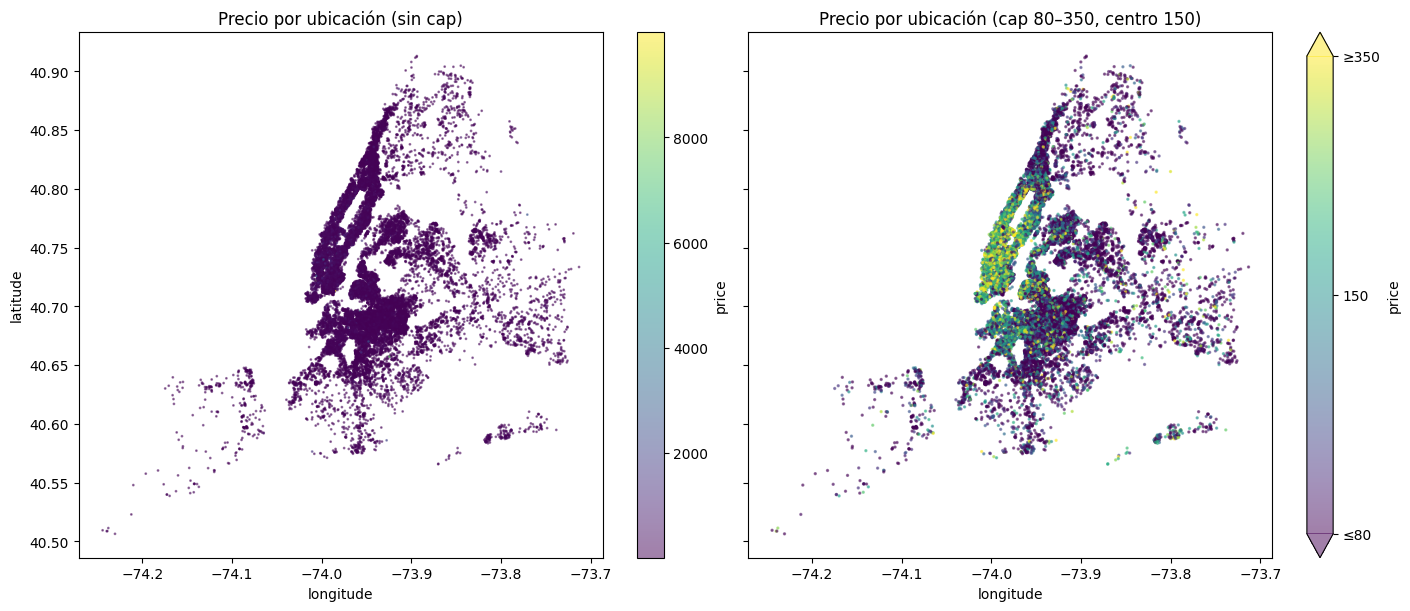

In [17]:
# import matplotlib.pyplot as plt
# from matplotlib.colors import TwoSlopeNorm

norm = TwoSlopeNorm(vmin=80, vcenter=150, vmax=350)

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True, constrained_layout=True)

# Scatter sin cap 
sc1 = axes[0].scatter(df['longitude'], df['latitude'],c=df['price'], s=1, alpha=0.5)
cb1 = fig.colorbar(sc1, ax=axes[0])
cb1.set_label('price')
axes[0].set_title('Precio por ubicación (sin cap)')
axes[0].set_xlabel('longitude'); axes[0].set_ylabel('latitude')

# Scatter centrado en 150 con clip 80–350 
sc2 = axes[1].scatter(
    df['longitude'], df['latitude'],
    c=df['price'], s=2, alpha=0.5,
    cmap='viridis',    # si quieres contraste arriba/abajo de 150, prueba 'coolwarm' o 'RdBu_r'
    norm=norm
)
cb2 = fig.colorbar(sc2, ax=axes[1], extend='both')
cb2.set_label('price')
cb2.set_ticks([80, 150, 350])
cb2.set_ticklabels(['≤80', '150', '≥350'])
axes[1].set_title('Precio por ubicación (cap 80–350, centro 150)')
axes[1].set_xlabel('longitude')

plt.show()

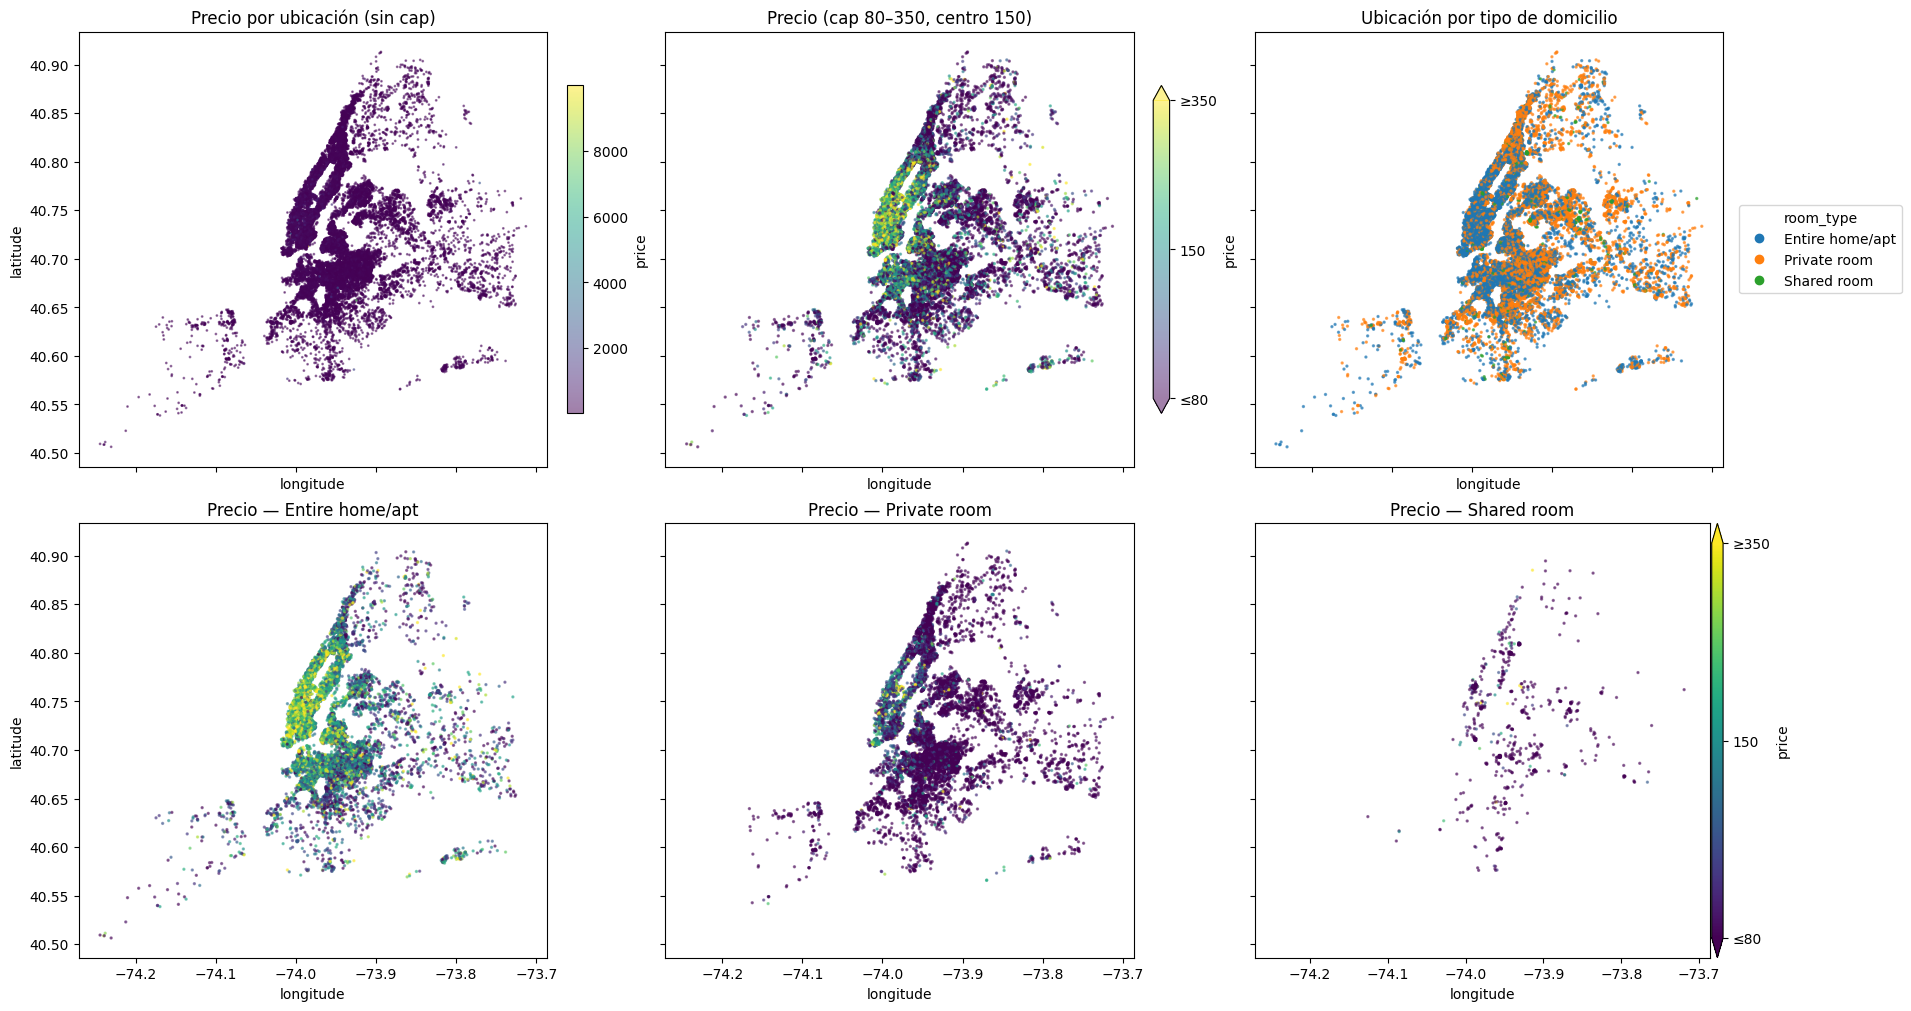

In [18]:
from matplotlib.colors import TwoSlopeNorm, ListedColormap
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable  # <-- NUEVO

norm = TwoSlopeNorm(vmin=80, vcenter=150, vmax=350)

# 2 filas x 3 columnas
fig, axes = plt.subplots(2, 3, figsize=(19, 10), sharex=True, sharey=True, layout='constrained')

# ===== Fila 1 =====
# (1) sin cap
sc1 = axes[0,0].scatter(df['longitude'], df['latitude'], c=df['price'], s=1, alpha=0.5)
cb1 = fig.colorbar(sc1, ax=axes[0,0], fraction=0.035, pad=0.02, shrink=0.9)
cb1.set_label('price')
axes[0,0].set_title('Precio por ubicación (sin cap)')
axes[0,0].set_xlabel('longitude'); axes[0,0].set_ylabel('latitude')

# (2) con cap 80–350, centro 150
sc2 = axes[0,1].scatter(
    df['longitude'], df['latitude'],
    c=df['price'], s=2, alpha=0.5,
    cmap='viridis', norm=norm
)
cb2 = fig.colorbar(sc2, ax=axes[0,1], extend='both', fraction=0.035, pad=0.02, shrink=0.9)
cb2.set_label('price')
cb2.set_ticks([80,150,350]); cb2.set_ticklabels(['≤80','150','≥350'])
axes[0,1].set_title('Precio (cap 80–350, centro 150)')
axes[0,1].set_xlabel('longitude')

# (3) categórico por room_type
room_types = df['room_type'].dropna().value_counts().index[:3]
codes = df['room_type'].map({rt: i for i, rt in enumerate(room_types)})
palette = ListedColormap(plt.get_cmap('tab10').colors[:3])

axes[0,2].scatter(
    df.loc[codes.notna(), 'longitude'],
    df.loc[codes.notna(), 'latitude'],
    c=codes.dropna().astype(int), s=2, alpha=0.6,
    cmap=palette, vmin=0, vmax=2
)
axes[0,2].set_title('Ubicación por tipo de domicilio')
axes[0,2].set_xlabel('longitude')
handles = [plt.Line2D([0],[0], marker='o', linestyle='', markersize=6,
                      color=palette(i), label=rt) for i, rt in enumerate(room_types)]
axes[0,2].legend(handles=handles, title='room_type',
                 loc='center left', bbox_to_anchor=(1.02, 0.5), frameon=True)

# ===== Fila 2: mapas por tipo con el mismo cap =====
for j, rt in enumerate(room_types):
    mask = (df['room_type'] == rt)
    axes[1,j].scatter(
        df.loc[mask, 'longitude'], df.loc[mask, 'latitude'],
        c=df.loc[mask, 'price'], s=2, alpha=0.5,
        cmap='viridis', norm=norm
    )
    axes[1,j].set_title(f'Precio — {rt}')
    axes[1,j].set_xlabel('longitude')
axes[1,0].set_ylabel('latitude')

# === Colorbar compartida de la 2ª fila, pegada al último subplot ===
mappable = mpl.cm.ScalarMappable(norm=norm, cmap='viridis'); mappable.set_array([])
divider = make_axes_locatable(axes[1,2])
cax = divider.append_axes("right", size="2.5%", pad=0.02)  # ajusta pad para acercar/alejar
cb_shared = fig.colorbar(mappable, cax=cax, extend='both')
cb_shared.set_label('price')
cb_shared.set_ticks([80,150,350]); cb_shared.set_ticklabels(['≤80','150','≥350'])

plt.show()